In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

In [5]:
centers = [[2, -6, -6],
           [-1, 9, 4],
           [-8, 7 , 2],
           [4, 7, 9]]

cluster_std = [1, 1, 2, 3.5]

X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

In [6]:
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

fig = px.scatter_3d(df, x='X', y='Y', z='Z',  color=labels_.astype(str), opacity=0.7, color_discrete_sequence=px.colors.qualitative.G10, title='3D Scatter Plot of Blobs')
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)

fig.show()

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

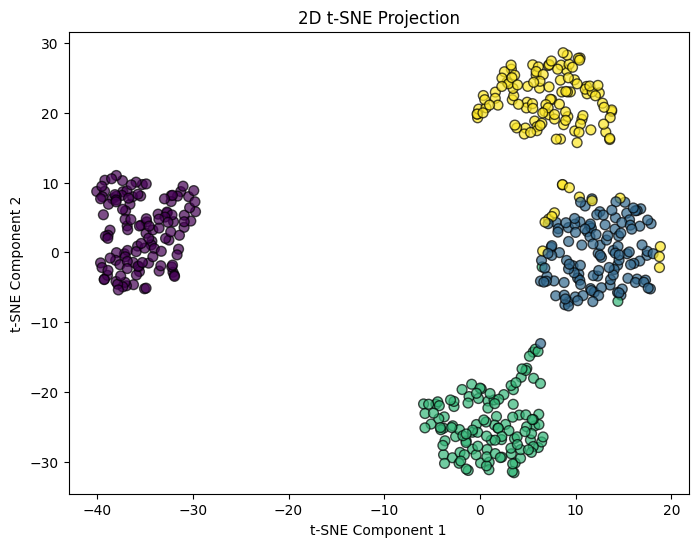

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title('2D t-SNE Projection')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
plt.show()

c:\Users\RogerChen\Desktop\study\python\ds\DS-learning\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



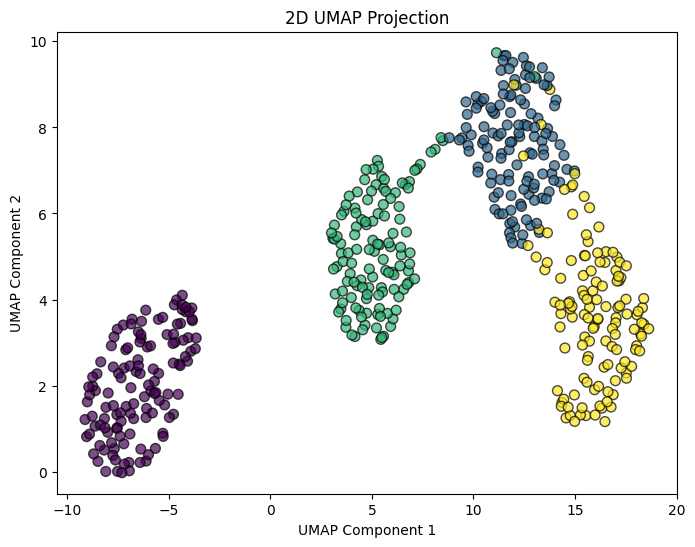

In [15]:
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1, n_jobs=1)
X_umap = umap_model.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title('2D UMAP Projection')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
plt.show()


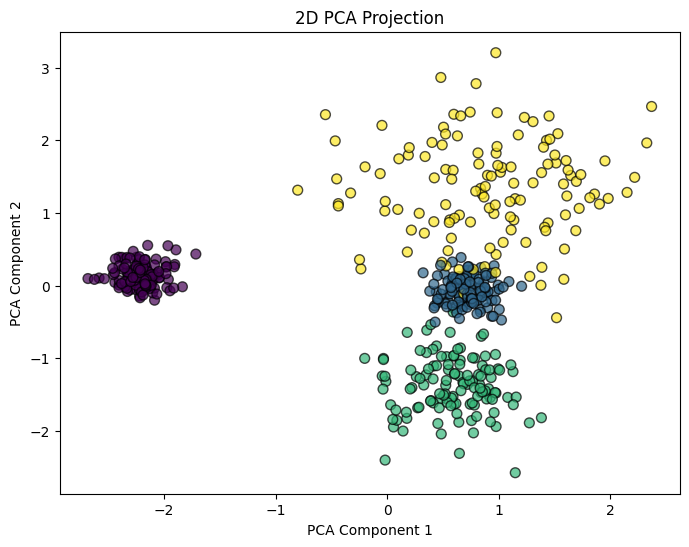

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))

ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title('2D PCA Projection')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
plt.show()